In [1]:
from rsi_backtest import make_extensive_test_ticker, backtest_rsi, make_extensive_test_tickers_list
import pandas as pd
import warnings

from stocks_data import find_stocks_with_high_volume
from tickers import *
from rsi_opportunity_analyzer import *
from stocks_data import get_data_with_adj_close
from position_sizing import *
from rsi_plot import plot_rsi_data
from atr_indicator import calculate_atr
from stop_setting import *

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Ignora FutureWarnings específicos relacionados a yfinance
warnings.filterwarnings("ignore", category=FutureWarning)

Relatório com Oportunidades de Ticker sobrecomprados e sobrevendidos e também ativos com volume acima da média em 1 desvio padrão

In [3]:
interval = "1wk"
ifix_analysis = analyze_rsi_opportunities_from_tickers(IFIX, interval, "2y")
idiv_analysis = analyze_rsi_opportunities_from_tickers(IDIV, interval, "10y", lower_rsi_limit=0.15)
print("____________IFIX_______________")
print_rsi_opportunity_analysis(ifix_analysis)
print(f"IFIX com alto volume {find_stocks_with_high_volume(IFIX, '1d', '1mo', 10)}")
print("____________IDIV_______________")
print_rsi_opportunity_analysis(idiv_analysis)
print(f"IDIV com alto volume {find_stocks_with_high_volume(IDIV, '1d', '1mo', 10)}")

____________IFIX_______________
overbought tickers: ['BCRI11', 'BTCI11', 'KCRE11', 'KNHY11', 'KNIP11', 'MFII11', 'NCHB11', 'PORD11', 'SADI11', 'SNCI11', 'TVRI11', 'URPR11', 'VGHF11', 'VSLH11', 'VCRI11', 'XPCI11', 'XPPR11', 'XPSF11']
oversold tickers: ['BLMG11']
IFIX com alto volume ['BLMR11', 'BTCI11', 'HGFF11', 'VRTA11', 'KNRI11', 'MORE11', 'VGHF11', 'VCJR11']
____________IDIV_______________
overbought tickers: ['BBAS3', 'CXSE3', 'CSMG3', 'VIVT3']
oversold tickers: ['EGIE3']
IDIV com alto volume []


Estudo de entradas e saídas em relação a um ativo em específico para diferentes alvos

In [16]:
ticker = "EGIE3"
period = "10y"
interval = "1wk"
use_stop = True
use_upper_threshold = True
use_target = True
min_holding_period = 4
use_moving_stop = True
atr_factor= 2

print(f"____________backtest {ticker}_______________")
backtest = backtest_rsi(ticker, 1, period, interval, min_holding_period=min_holding_period, use_stop=use_stop,
                        use_upper_threshold=use_upper_threshold, use_target=use_target, use_moving_stop=use_moving_stop, atr_factor=atr_factor)
print(backtest)

print(f"____________ticker_analysis_results {ticker}_______________")
ticker_analysis_results = make_extensive_test_ticker(ticker, period, interval,
                                                        min_holding_period=min_holding_period,
                                                        use_stop=use_stop, use_upper_threshold=use_upper_threshold,
                                                        use_target=use_target, use_moving_stop=use_moving_stop, atr_factor=atr_factor)
print(ticker_analysis_results)

____________backtest EGIE3_______________
    Entry RSI Signal Date Entry Date      Entry       Stop     Target  Exit Date Duration  Gain/Loss %  Result  Initial stop  R multiple
0   49.724720  2014-04-28 2014-05-05  14.820207  14.125151  15.949341 2014-08-18 105 days     7.618881  Target     13.691073    1.000000
1   48.567364  2014-10-27 2014-11-10  15.271118  13.547830  17.176576 2015-02-09  91 days   -11.284624    Stop     13.365660   -0.904396
2   53.762954  2014-11-17 2014-11-24  15.847373  14.315049  17.379697 2015-01-12  49 days    -9.669261    Stop     14.315049   -1.000000
3   46.604416  2015-02-09 2015-02-16  14.550859  13.855382  15.701663 2015-03-23  35 days    11.713685  Target     13.400056    1.481089
4   48.171567  2015-08-24 2015-09-14  15.936813  14.440555  17.433071 2015-11-02  49 days     9.388690  Target     14.440555    1.000000
5   46.748960  2015-09-07 2015-09-14  15.578225  14.440555  16.715895 2015-11-02  49 days     7.302950  Target     14.440555    1.000000

Estudo extensivo de todo um mercado para encontrar os melhores indicadores para cada alvo

In [7]:
period = "10y"
interval = "1wk"
use_stop = True
use_upper_threshold = True
use_target = True
min_holding_period = 4
use_moving_stop = True

print(make_extensive_test_tickers_list(IDIV, period, interval, min_holding_period=min_holding_period,
                                        use_stop=use_stop, use_upper_threshold=use_upper_threshold,
                                        use_target=use_target, use_moving_stop=use_moving_stop))

   Target  Avg. Success Rate                Avg. Period  Avg. Profit  Avg. Annualized return  Avg. Risk Multiple  No. Operations
0       1          56.877128 55 days 20:22:38.490566038     4.928631               55.754159            0.388751           793.0
1     1.1          55.508583 57 days 22:38:29.433962264     5.060040               54.606736            0.395413           793.0
2     1.2          53.732738 59 days 22:11:19.245283019     5.045823               51.052358            0.394925           793.0
3     1.3          51.570623 62 days 10:24:54.339622642     4.990851               49.142727            0.382656           793.0
4     1.4          50.723869 64 days 01:21:30.566037736     5.183748               49.667067            0.401735           793.0
5     1.5          50.118490 65 days 18:33:57.735849057     5.395005               50.853020            0.413616           793.0
6     1.6          49.386363 67 days 04:31:41.886792453     5.480397               48.244402     

Encontra os limites superior e inferior de RSI para um determinado ativo

limite inferior de RSI para o ticker EGIE3: 45.300376425289556
limite superior de RSI para o ticker EGIE3: 66.92188669223586
valor atual de RSI para o ticker EGIE3: 43.20868924098084


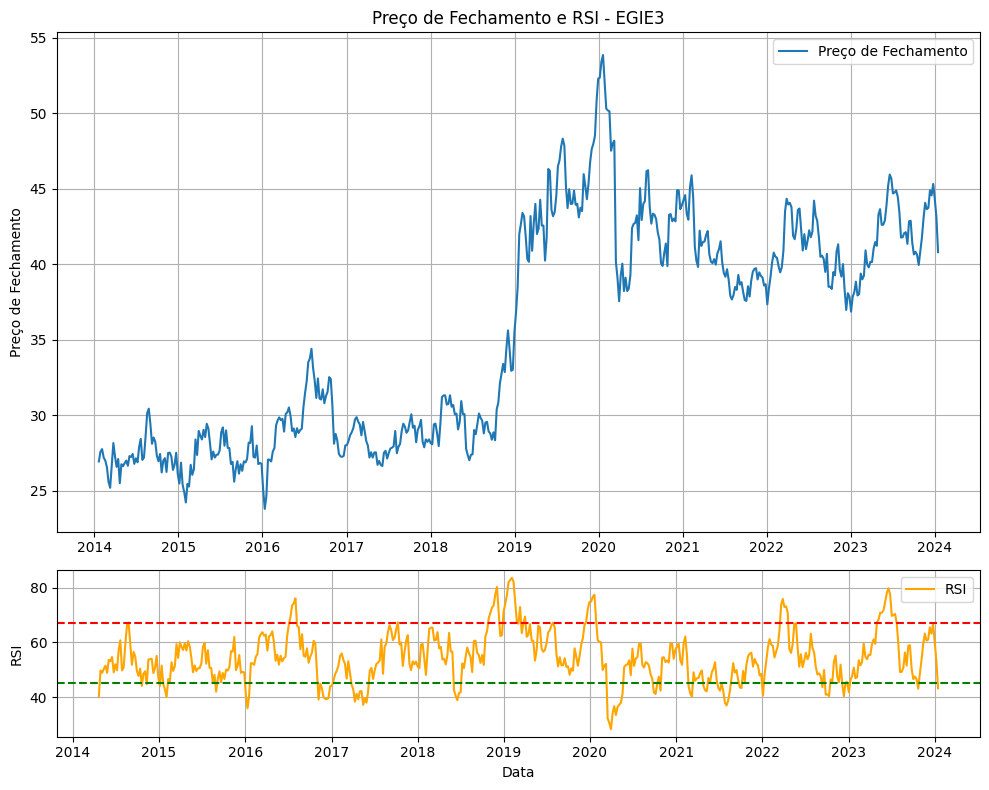

In [3]:
ticker = "EGIE3"
period = "10y"
interval = "1wk"

low_threshold = 0.15
high_threshold = 0.9

data = get_data_with_adj_close(ticker, interval, period)
rsi = calculate_rsi(data, period=14)
lower_threshold = get_lower_threshold_rsi(rsi, low_threshold)
upper_threshold = get_upper_threshold_rsi(rsi, high_threshold)

print(f"limite inferior de RSI para o ticker {ticker}: {lower_threshold}")
print(f"limite superior de RSI para o ticker {ticker}: {upper_threshold}")
print(f"valor atual de RSI para o ticker {ticker}: {rsi.iloc[-1]}")
plot_rsi_data(data, rsi, ticker, upper_threshold, lower_threshold)
# print(data['RSI'])

Position sizing

In [ ]:
from position_sizing import get_unit_risk

entry = 15.15
stop_entry_weekly = 14.16
max_loss = 400

unit_risk = get_unit_risk(entry, stop_entry_weekly)
number_stocks = get_number_stocks_based_on_risk(unit_risk, max_loss)

print(f"Para um risco unitário de {unit_risk}, risco máximo de {max_loss}, comprar {number_stocks} unidades da ação")

Para um risco unitário de 0.9900000000000002, risco máximo de 400, comprar 405 unidades da ação


In [1]:
ticker = "BEEF3"
period = "10y"
interval = "1wk"
entry = 7.22
data = get_data_with_adj_close(ticker, interval, period)
factor = 1
atr = data['ATR'][-1]
stop_entry_weekly = get_stop_atr(entry, atr, factor)

print(f"stop de entrada {stop_entry_weekly} ajustado, pela ATR para entrada {entry}, atr {atr}, fator {factor}")


NameError: name 'get_data_with_adj_close' is not defined

In [4]:
ticker = "CMIG3"
period = "10y"
interval = "1wk"
factor = 0.7
atr_periods = 20
data = get_data_with_adj_close(ticker, interval, period)

print(current_stop_finder(data, 14.16, factor, atr_periods=atr_periods))

14.380749664306641
